In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sale = pd.read_csv("Diwali_Sales_Data.csv" ,   encoding='unicode_escape')
sale.shape

(11251, 15)

In [3]:
sale.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount', 'Status', 'unnamed1'],
      dtype='object')

In [4]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
sale.drop(['Status' , 'unnamed1'] , axis = 1  , inplace = True)


In [6]:
sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [7]:
sale.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [10]:
sale.dropna(inplace=True)

In [12]:
sale.shape
sale.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [13]:
sale.Amount = sale.Amount.astype('int')

In [17]:
sale.Amount.dtypes
#sale.to_csv("clean_diwali_sales.csv", index=False)
sale.Occupation.unique()

array(['Healthcare', 'Govt', 'Automobile', 'Construction',
       'Food Processing', 'Lawyer', 'Media', 'Banking', 'Retail',
       'IT Sector', 'Aviation', 'Hospitality', 'Agriculture', 'Textile',
       'Chemical'], dtype=object)

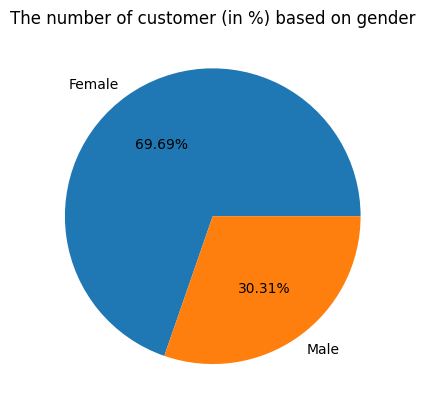

In [48]:
plt.pie(sale.groupby('Gender').size().values , labels=['Female','Male'] , autopct= "%0.2f%%")
plt.title('The number of customer (in %) based on gender')
plt.show()

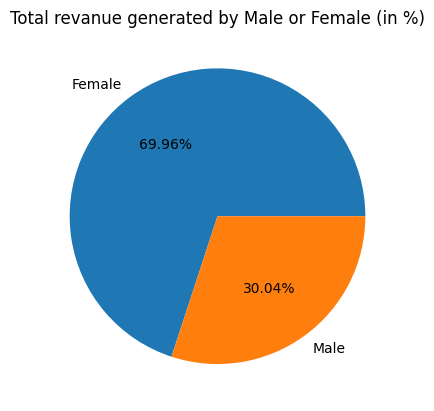

In [49]:
plt.pie(sale.groupby('Gender')['Amount'].sum().values , labels=['Female','Male'] , autopct="%0.2f%%")
plt.title('Total revanue generated by Male or Female (in %)')
plt.show()

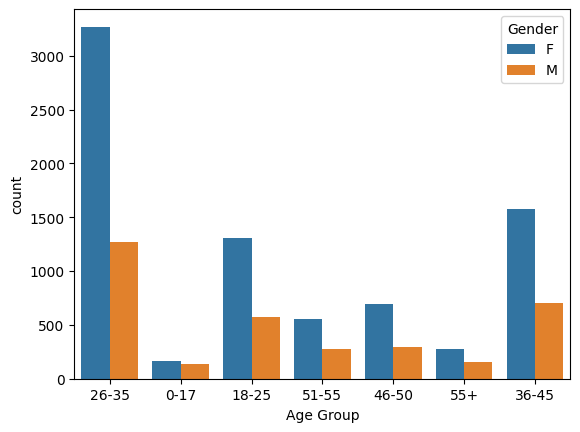

In [53]:
sns.countplot(data=sale, x = 'Age Group' , hue = "Gender")
plt.show()

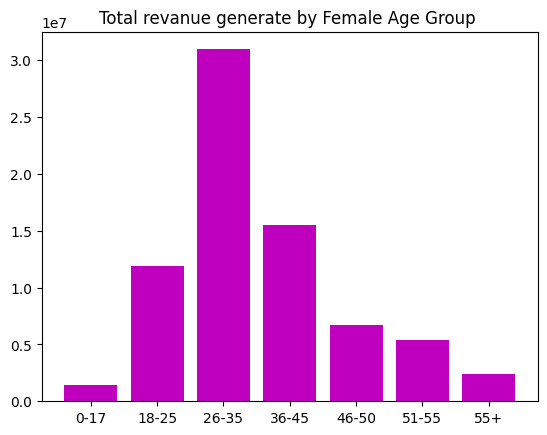

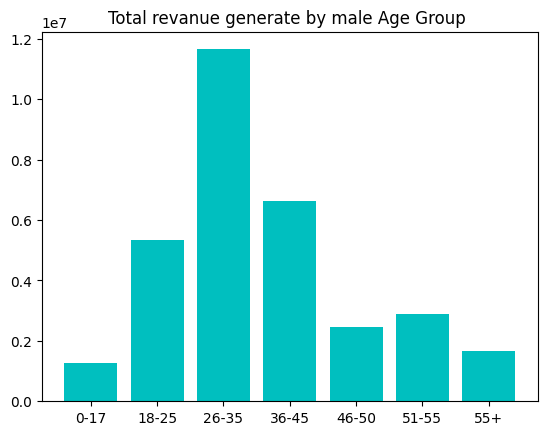

In [82]:
full_data = sale.groupby(['Age Group' , 'Gender'])['Amount'].sum().reset_index()
female_data = full_data.drop(full_data[full_data.Gender == 'M'].index)
male_data = full_data.drop(full_data[full_data.Gender == 'F'].index)
male_data
 

plt.bar(female_data['Age Group'] , female_data.Amount ,color='m' )
plt.title("Total revanue generate by Female Age Group ")
plt.show()

plt.bar(male_data['Age Group'] , male_data.Amount ,color='c' )
plt.title("Total revanue generate by male Age Group ")
plt.show()


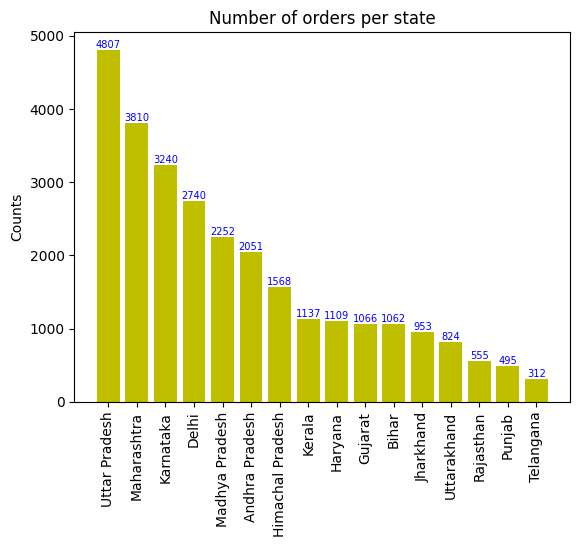

In [129]:
ordered = sale.groupby('State')['Orders'].sum().sort_values(ascending=False)

fig, ax = plt.subplots()
rects = ax.bar(ordered.index, ordered.values , color='y' , width=0.8)

for bars in ax.containers:
    ax.bar_label(bars , fontsize=7.1 , color = 'b')
plt.xticks(rotation = 90)
plt.title("Number of orders per state")
plt.ylabel("Counts")
plt.show()